#11.Аппроксимация данных. Радиоактивный распад
Закон радиоактивного распада, открытый Э.Резерфрдом и Ф.Содди, утверждает, что активность радиоактивного вещества уменьшается во времени по экспоненциальному закону (геометрической прогресии). Таким образов, активность такого вещества можно характеризовать периодом полураспада – промежутком временем, в течении которого активность уменьшается в $2$ раза. Здесь мы приводим данные, опубликованные в работе [Rutherford E. A Radioactive Substance emitted from Thorium Compounds // Philosophical Magazine. 1900. 49. 1–14]. Из сосуда с торием, был выкачан воздух. В результате была выделена эманация тория (газ радон-220, или торон). Для измерения ее ионизирующей способности подавалось напряжение 100 В и измерялась сила тока, которая менялась во времени.
```
 Время, с   Сила тока, А
      0          1.00
     28          0.69
     62          0.51
    118          0.23
    155          0.14
    210          0.067
    272          0.041
    360          0.018
```
* Изобразите данные на графике.
* Восстановите зависимость $y=c e^{\alpha t}$. Воспользуйтесь двумя методами:
   * логарифмированием сведите задачу к линейной задаче наименьших квадратов,
   * нелинейным методом наименьших квадратов
* Изобразите графики построенных зависимостей.
* Насколько хорошо установленные зависимости приближают данные? Какая из них лучше?
* Определите период полураспада радона-220 и сравните его с данными из интернета. Чем обусловлено расхождение (если оно есть)?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg

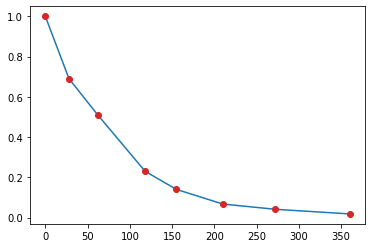

In [4]:
x = np.array([0,  28,  62,  118,  155,  210, 272, 360])
y = np.array([1.00, 0.69, 0.51,  0.23, 0.14, 0.067, 0.041, 0.018])
plt.plot(x, y, color = 'tab:blue')
plt.plot(x, y, 'o', color = 'tab:red')
pass

#Метод наименьших квадратов(МНК).
Пусть имеются точки $(x_1, y_1), (x_2, y_2), \dots, (x_m, y_m).$ Необходимо найти линейную функцию (простая линейная регрессия)
$$ y = \beta_0 + \beta_1 x, $$
где $$ y_i \approx \beta_0 + \beta_1 x_i \qquad (i=1,2,\dots, m). $$
Будем решать задачу через матрицы. Пусть: $$ X = \left(\begin{array}{cc} 1 & x_1 \\\\1 & x_2 \\\\ \vdots & \vdots \\\\ 1 & x_m \\\\\ \end{array}\right),\qquad y =\left(\begin{array}{c}y_1 \\\\y_2 \\\\ \vdots \\\\ y_m \\\\ \end{array}\right)\qquad,\beta =\left(\begin{array}{c}\beta_0 \\\\ \beta_1 \\\\\end{array}\right)
$$
Система нормальных уравнений:
$$
  (X^{\rm T} X)\, \beta = X^{\rm T} y.
$$
Получаем:

(-0.07535205973302316, -0.011445651432512166)

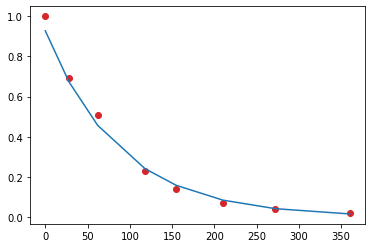

In [5]:
logr = np.log(y)
n = len(x)
X = np.stack((np.ones(n), x)).T
beta = np.linalg.solve(X.T@X, X.T@logr)
beta0,beta1 = beta
plt.plot(x, y, 'o',color = 'tab:red' )
plt.plot(x,np.exp(beta0)*np.exp(beta1*x))
pass
beta0,beta1



В $ x $ указываем произвольное значение и с помощью зависимости  $ y = \beta_0 + \beta_1 x, $ необходимо получить $y = 0.5$

1.6487817103863547

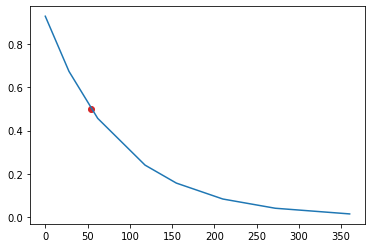

In [105]:
x1 = 53.97
y1 = np.exp(beta0)*np.exp(beta1*x1)
plt.plot(x1, y1, 'o',color = 'tab:red' )
plt.plot(x,np.exp(beta0)*np.exp(beta1*x))
pass
np.exp(y1)

Период полураспада радона-220 равен 55.6(1)с, полученный период$\approx$53.97с. Разница между значениями$\approx$1,64с.